In [ ]:
########################################################
#  Developed by Jonathan Ojeda 24-01-2021 QAAFI UQ
# Collaborator: Jose Jauregui GENTOS Argentina
#  Functionalities:
#  - Fit cuadratic and Piecewise curves
#  - horizontal bar plot with sns
########################################################

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import log as ln
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import optimize
import matplotlib.pyplot as plt
import pwlf
import scipy
from scipy import stats

#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [121]:
data= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\data.csv')
data2= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\data2.csv')
data4= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\data4.csv')

[ 341.         1070.41248177 3900.        ]


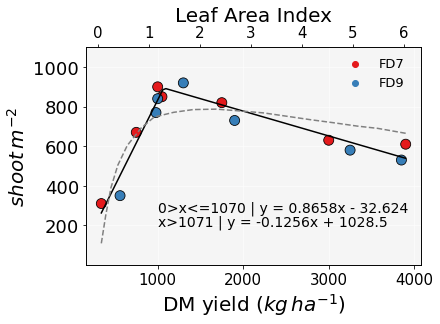

In [128]:
x = data2.DM.values
y = data2.shoot.values

my_pwlf = pwlf.PiecewiseLinFit(x, y)
breaks = my_pwlf.fit(2)
print(breaks)

x_hat = np.linspace(x.min(), x.max(), 100)
y_hat = my_pwlf.predict(x_hat)

ax = sns.scatterplot(x='DM', y='shoot', hue='dormancy', data=data2, palette='Set1', **kwargs, alpha=1, s=100)
plt.plot(x_hat, y_hat, '-',color='black')
plt.legend(prop=dict(size=13),bbox_to_anchor=(0.75, 0.98), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('$shoot\,m^{-2}$', fontsize =20)
plt.xlabel('DM yield ($kg\,ha^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(0.01,1099)

plt.text(1000, 270,'0>x<=1070 | y = 0.8658x - 32.624',fontsize=14,color='k')
plt.text(1000, 200,'x>1071 | y = -0.1256x + 1028.5',fontsize=14,color='k')

ax2 = plt.twiny()
ax2.plot(data.LAI, data.shoot, color="grey", markersize=1.5, linestyle='--', marker='')
plt.xlabel('Leaf Area Index', fontsize =20)
ax2.xaxis.set_tick_params(labelsize=15)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\fig1.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

            2
-2.116e-05 x - 0.0004095 x + 0.3674


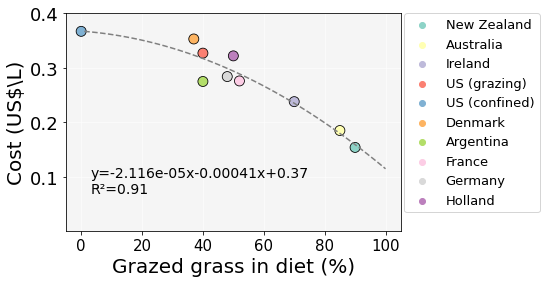

In [129]:
x = data4.grass.values
y = data4.cost2.values

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x, y, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 100, 50)

ax = sns.scatterplot(x='grass', y='cost2', hue='country', data=data4, palette='Set3', **kwargs, alpha=1, s=100)

plt.plot(polyline, model(polyline), color='grey', linestyle='--')
plt.legend(prop=dict(size=13),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., frameon=True)
plt.ylabel('Cost (US$\L)', fontsize =20)
plt.xlabel('Grazed grass in diet (%)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(0.001,0.4)

print(model)
plt.text(3, 0.1,'y=-2.116e-05x-0.00041x+0.37',fontsize=14,color='k')
plt.text(3, 0.07,'R²=0.91',fontsize=14,color='k')

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\fig4.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

In [69]:
fig2 = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\fig2.csv')

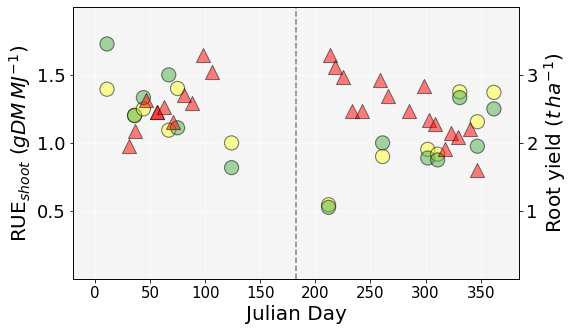

In [152]:
fig= plt.figure(figsize=(8,5))

kwargs  =   {'edgecolor':"k"}
ax = sns.scatterplot(x='jday', y='rue', hue='irri', data=fig2, palette='Set1_r', **kwargs, alpha=0.5, s=200)
plt.axvline(x=182.5, color='grey', linestyle='--')
plt.legend(prop=dict(size=15),bbox_to_anchor=(0.01, 0.25), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('RUE$_{shoot}$ ($gDM\,MJ^{-1}$)', fontsize =20)
r'$H_{2}$'
plt.xlabel('Julian Day', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(0.001,1.999)
ax.set_xlim(-20,385)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

#plt.text(1000, 270,'0>x<=1070 | y = 0.8658x - 32.624',fontsize=14,color='k')
#plt.text(1000, 200,'x>1071 | y = -0.1256x + 1028.5',fontsize=14,color='k')

ax2 = plt.twinx()

plt.scatter(fig2.jday, fig2.root, color="red", marker="^", linewidth=1, edgecolor='black', s=200, alpha = 0.5)
plt.ylabel('Root yield ($t\,ha^{-1}$)', fontsize =20)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_ylim(0.001,3.999)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\fig2.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

In [228]:
fig5 = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\dataYield.csv')

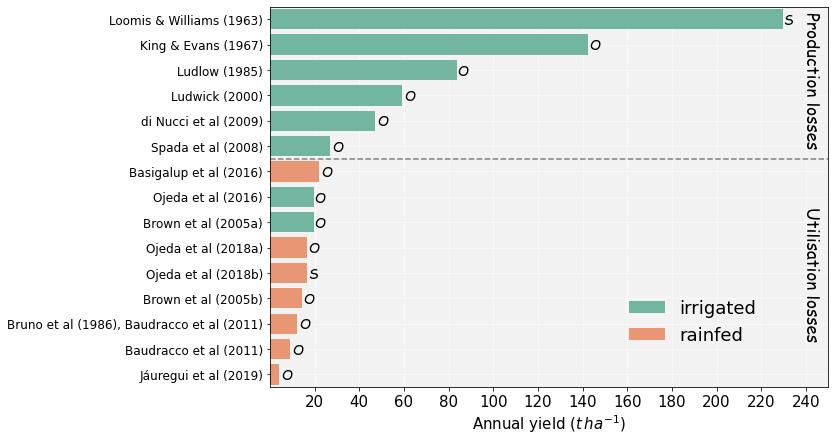

In [280]:
fig = plt.figure(figsize=(10,7))

ax=plt.subplot(1, 1, 1)

sns.barplot(x="DM", y="ref", hue="irri", data=fig5, linewidth=0.4, orient="h",dodge=False, palette="Set2")
plt.setp(ax.collections, alpha=.4)
plt.axhline(y=5.5, color='grey', linestyle='--')

# Formatting graph and background
plt.legend(prop=dict(size=18),bbox_to_anchor=(0.63, 0.25), loc=2, borderaxespad=0., frameon=False)
plt.xlabel('Annual yield ($t\,ha^{-1}$)', fontsize =15)
plt.ylabel('', fontsize =10)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.95')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_xlim([0.1,249.9])

plt.subplots_adjust(wspace=0, hspace=0.2)

plt.text(230, 0.2, 'S',fontsize=14,color='k',family='fantasy')
plt.text(143, 1.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(84, 2.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(60, 3.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(48, 4.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(28, 5.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(23, 6.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(20, 7.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(20, 8.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(17, 9.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(17, 10.2, 'S',fontsize=14,color='k',family='fantasy')
plt.text(15, 11.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(13, 12.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(10, 13.2, 'O',fontsize=14,color='k',family='fantasy')
plt.text(5, 14.2, 'O',fontsize=14,color='k',family='fantasy')

plt.text(238, 4.9, 'Production losses',fontsize=17,color='k',family='fantasy',rotation=270)
plt.text(238, 12.5, 'Utilisation losses',fontsize=17,color='k',family='fantasy',rotation=270)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\fig5.png', dpi=300,bbox_inches='tight')